In [1]:
import pandas as pd
from openai import OpenAI

In [2]:
df = pd.read_csv('DW-MasterSheetCopies.csv')
df.head()

,Exhibit Group,Exhibit Name,Exhibit Popularity,Exhibit Copy
0,All-Aboard,All-Aboard,1,All Aboard!\r\nTrains and railways have been a...
1,Automation Everywhere,A.I. Table Tennis,5,A.I. Table Tennis\r\nStep up and help Discover...
2,Automation Everywhere,Ball Park Roof,5,Ball Park Roof\r\nThe fan-shaped roof includes...
3,Automation Everywhere,Calatrava,4,IGNORE
4,Automation Everywhere,Compression Rheostat,5,Compression Rheostat\r\nTighten the handle to ...


In [3]:
df.columns = [x.replace(" ", "_") for x in df.columns]
df.columns

Index(['Exhibit_Group', 'Exhibit_Name', 'Exhibit_Popularity', 'Exhibit_Copy'], dtype='object')

In [4]:
# turn Exhibit_Popularity into an int
df['Exhibit_Popularity'] = df['Exhibit_Popularity'].replace('-', 6)
df['Exhibit_Popularity'] = df['Exhibit_Popularity'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Exhibit_Group       85 non-null     object
 1   Exhibit_Name        85 non-null     object
 2   Exhibit_Popularity  85 non-null     int64 
 3   Exhibit_Copy        85 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.8+ KB


In [5]:
# give stats on the data
df.describe()

,Exhibit_Popularity
count,85.000000
mean,3.141176
std,1.746786
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,6.000000


In [6]:
# show spread of exhibit_popularity
df['Exhibit_Popularity'].value_counts()

Exhibit_Popularity
5    23
2    16
4    15
3    11
1     9
0     8
6     3
Name: count, dtype: int64

In [ ]:
# drop rows with popularity of 0
df = df[df['Exhibit_Popularity'] != 0]
# drop rows with popularity higher than 3
df = df[df['Exhibit_Popularity'] <= 3]
# drop rows with Exhibit_Copy = "IGNORE"
df = df[df['Exhibit_Copy'] != "IGNORE"]

In [13]:
df['Exhibit_Popularity'].value_counts()

Exhibit_Popularity
2    15
3    10
1     6
Name: count, dtype: int64

In [16]:
# swap "\r\n" for "\n" in Exhibit_Copy
df['Exhibit_Copy'] = df['Exhibit_Copy'].str.replace("\r\n", "\n")
df.head()

,Exhibit_Group,Exhibit_Name,Exhibit_Popularity,Exhibit_Copy
0,All-Aboard,All-Aboard,1,All Aboard!\nTrains and railways have been a '...
5,Automation Everywhere,Connect Four,3,Fanuc Robot-M-11a\nGary is a sorting robot bui...
6,Automation Everywhere,Dream Machine,1,Sensor\n1. 42KD Miniature Photoelectric Sensor...
7,Automation Everywhere,Dream Machine: Control Cabinet,3,Control Cabinet\nThis cabinet houses the elect...
10,Automation Everywhere,Sensor Challenge,2,Can You Beat The Machine?\nTake the Sensor Cha...


<Axes: xlabel='Exhibit_Group'>

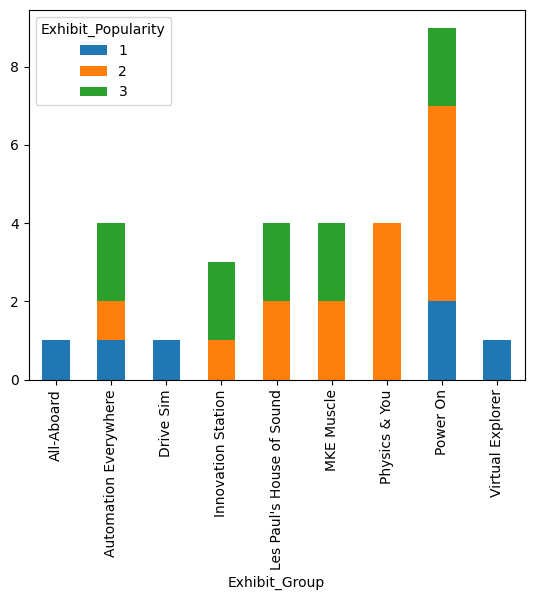

In [19]:
# graph value counts of Exhibit_Popularity by Exhibit_Group
df.groupby('Exhibit_Group')['Exhibit_Popularity'].value_counts().unstack().plot(kind='bar', stacked=True)

1. Append "Language" col (pad with "English")
2. Preprocess all of the "Exhibit_Copy" info into ["Simplified", "Standard", "Technical"]
4. For each entry, translate "Exhibit_Copy" info into ["Spanish", "Hmong"] and change the "Language"
5. Save this as base_translation.csv
6. For each technical entry, create a Standard entry
7. For each standard entry, create a Simplified Entry
8. For each English entry without a Spanish or Hmong entry, create a 

In [ ]:
df["Language"] = "English"

In [ ]:
MODEL_API_URL = "http://dh-dgxh100-2.hpc.msoe.edu:8000/v1"

# Initialize the OpenAI client with the model's base URL
client = OpenAI(
    base_url=MODEL_API_URL,
    api_key="not_used"
)

In [ ]:
from openai import OpenAI

client = OpenAI(
    base_url = "http://dh-dgxh100-2.hpc.msoe.edu:8000/v1",
    api_key = "not_used"
)

In [ ]:
def classify_exhibit_copy(group, title, body):
    completion = client.chat.completions.create(
        model="meta/llama-3.1-70b-instruct",
        messages=[
            { "role": "system", "content": "You are a helpful and informative AI assistant, capable of understanding complex questions and providing comprehensive, well-reasoned responses based on your knowledge. Always strive to be factual and objective in your answers." },
            {
                "role": "user",
                "content": f"""Classify the following exhibit information into one of the categories: Simplified, Standard, Technical:
                Exhibit Info:
                Exhibit Group: {group}
                Exhibit Title: {title}
                Exhibit Body: {body}
                """,
            },
        ],
        max_tokens=48,
        stream=False
    )
    return completion.choices[0].message.content

In [ ]:
# classify the exhibit copy
df['Exhibit_Copy_Classification'] = df.apply(lambda x: classify_exhibit_copy(x['Exhibit_Group'], x['Exhibit_Title'], x['Exhibit_Copy']), axis=1)